In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=500, noise=0.06, random_state=42)

df = pd.DataFrame(dict(x1=X[:, 0], x2=X[:, 1], y=y))

In [2]:
df.head()

,x1,x2,y
0,-0.750878,0.321070,1
1,-0.144829,0.990214,0
2,-0.765681,0.028995,1
3,-0.658622,-0.652663,0
4,-0.818977,0.612161,0


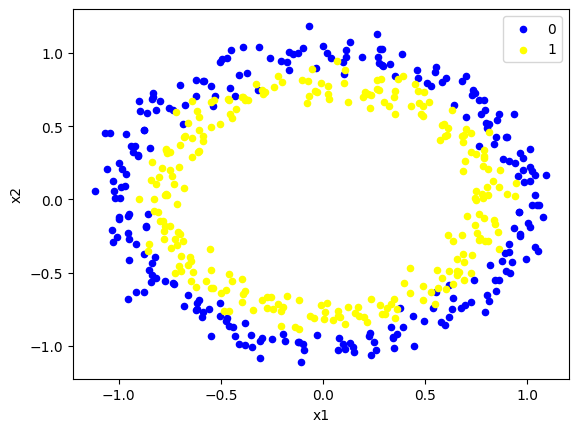

In [3]:
colors = {0:'blue', 1:'yellow'}
fig, ax = plt.subplots()
grouped = df.groupby('y')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x1', y='x2', label=key, color = colors[key])
plt.show()

In [4]:
#USING LINEAR SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = SVC(kernel="linear")

clf.fit(X, y)

pred = clf.predict(X)

print("Accuracy: ",accuracy_score(pred, y))



Accuracy:  0.496


In [5]:
#USING POLYNOMIAL KERNEL

clf = SVC(kernel="poly")

clf.fit(X, y)

pred = clf.predict(X)

#RBFprint("Accuracy: ",accuracy_score(pred, y))

Accuracy:  0.566


In [6]:

def RBF(X, gamma):

    # Free parameter gamma
    if gamma == None:
        gamma = 1.0/X.shape[1]

    # RBF kernel Equation
    K = np.exp(-gamma * np.sum((X - X[:,np.newaxis])**2, axis = -1))

    return K

In [7]:
X = RBF(X, gamma=None)

In [8]:
clf = SVC(kernel="linear")

clf.fit(X, y)

pred = clf.predict(X)

print("Accuracy: ",accuracy_score(pred, y))

Accuracy:  0.94
